# live

In [23]:
import requests
import pandas
i2m_url = 'https://api.dd-decaf.eu'
m_url = 'http://10.16.130.35:8000'
header = {'Authorization': ''}

# local

In [1]:
from ggplot import *

/usr/local/Cellar/pyenv/1.0.8/versions/3.6.0/envs/py36c/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/Cellar/pyenv/1.0.8/versions/3.6.0/envs/py36c/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/Cellar/pyenv/1.0.8/versions/3.6.0/envs/py36c/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
import requests
import pandas
import json
i2m_url = 'http://10.16.130.35:7000'
i2m_url = 'http://172.30.31.53:7000'

m_url = 'http://10.16.141.57:8000'

In [45]:
message = {
        'to-return': ['tmy', 'growth-rate'],
        'objectives': ['chebi:17579'],
        'reactions-add': [{'id': 'MagicCarrot', 'string': 'glc__D_c <=> caro_c'}]
    }
response = requests.post(m_url + '/models/iJO1366', json={'message': message})

In [46]:
tmy = response.json()

In [51]:
sum(tmy['tmy']['chebi:17579']['DM_caro_e']) - 97.62

0.0010526315789576302

In [28]:
from cobra.io.dict import model_from_dict

In [3]:
query = {"ids": ["C00003", "C05413", "C05421", "C00448", "C05431", "C03427", "C00080", "C01504", "C16291", "C07720", "C00129", "C00013", "C02094", "C05434", "C05435", "C00004", "C00353", "C00007", "C05432"], "dbFrom": "kegg", "dbTo": "yeast7", "type": "Metabolite"}


In [59]:
query = {"ids": ["16236", "12965"], "dbFrom": "chebi", "dbTo": "bigg", "type": "Metabolite"}

In [68]:
query = {"ids": ["glc__D"], "dbFrom": "bigg", "dbTo": "chebi", "type": "Metabolite"}

In [69]:
# query = {"ids": ["MNXM153068"], "dbFrom": "mnx", "dbTo": "bigg", "type": "Metabolite"}
s = time.time()
response = requests.post('https://api.dd-decaf.eu/idmapping/query', data=json.dumps(query))
tjo = response.json()
print(time.time() - s)

4.766398906707764


In [70]:
tjo

{'ids': {'glc__D': ['17634', '12965', '20999', '4167']}}

In [37]:
import aiohttp
import asyncio
import time

In [33]:
async def query_identifiers(query):
    s = time.time()
    async with aiohttp.ClientSession() as session:
        async with session.post('https://api.dd-decaf.eu/idmapping/query', data=json.dumps(query)) as r:
            assert r.status == 200, f'response status {r.status} from identifier service'
            result = await r.json()
            print(time.time() - s)
            return result['ids']


In [49]:
loop = asyncio.get_event_loop()
tasks = [asyncio.ensure_future(query_identifiers(query))]
loop.run_until_complete(asyncio.wait(tasks))

1.540081262588501


({<Task finished coro=<query_identifiers() done, defined at <ipython-input-33-7e4ec05d63e6>:1> result={'C00003': ['s_1198', 's_1199', 's_1200', 's_1201', 's_1202', 's_2820'], 'C00004': ['s_1203', 's_1204', 's_1205', 's_1206', 's_2818'], 'C00007': ['s_1275', 's_1276', 's_1277', 's_1278', 's_1279', 's_2817'], 'C00013': ['s_0633', 's_0635', 's_0636', 's_0637', 's_0638', 's_2834', ...], ...}>},
 set())

In [256]:
response = requests.post('https://api.dd-decaf.eu/idmapping/query',
              data=json.dumps({"ids": ["MNXM117"], "dbFrom": "mnx", "dbTo": "yeast7", 
                               "type": "Metabolite"})).json()['ids']
response

{'MNXM117': ['s_1552', 's_1553']}

In [5]:
payload = {'phaseId': 7, 'withFluxes': True, 'method': 'fba', 'modelId': 'iMM904', 'sampleIds': [33]}

In [54]:
payload = {'phaseId': 7, 'withFluxes': True, 'method': 'pfba', 'modelId': 'iMM904', 
           'sampleIds': [25, 26, 27, 28, 29, 30]}

In [3]:
payload = {'sampleIds': [88], 'phaseId': 21, 'modelId': 'ecYeast7'}

In [10]:
payload = {'sampleIds': [5]}

In [394]:
r = requests.post(m_url + '/models/ecYeast7', json={'message':{'to-return': ['model']}})
gecko_m = model_from_dict(r.json()['model'])

In [22]:
requests.get(i2m_url + '/experiments', headers=header).json()

{'response': [{'id': 5, 'name': 'harder'},
  {'id': 28, 'name': 'ecoeth'},
  {'id': 47, 'name': 'car'},
  {'id': 57, 'name': 'foo'},
  {'id': 58, 'name': 'nutrient-deficiency'},
  {'id': 60, 'name': 'suffocate'}]}

In [9]:
requests.get(i2m_url + '/experiments/47/samples').json()

{'response': [{'id': [88], 'name': 'DSM4, reference', 'organism': 'SCE'}]}

In [25]:
r = requests.post(i2m_url + '/data-adjusted/model', json=payload, headers=header)

In [10]:
r.json()['response']['7']['fluxes']['ENO']

15.0

In [29]:
m = model_from_dict(r.json()['response']['21']['model']) 

In [8]:
requests.post(i2m_url + '/samples/info', json=payload)

<Response [404]>

In [523]:
requests.post(i2m_url + '/samples/model-options', json=payload).json()

{'response': ['iMM904', 'ecYeast7']}

In [553]:
%time tmylr = requests.post(i2m_url + '/data-adjusted/maximum-yield', json=payload)

CPU times: user 8.59 ms, sys: 3.68 ms, total: 12.3 ms
Wall time: 1min 26s


In [557]:
tmylr.json()['response']['21']['metabolites']['beta-carotene']['phasePlanes']['wild']

{'objective': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'objectiveId': 'objective',
 'objectiveLowerBound': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'objectiveUpperBound': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

In [499]:
df = pandas.DataFrame(tmylr.json()['response']['21']['metabolites']['beta-carotene']['phasePlanes']['modified'])

In [501]:
df.head()

,objective,objectiveId,objectiveLowerBound,objectiveUpperBound
0,0.000000,DM_MNXM614_e,0.000000e+00,0.370747
1,0.000853,DM_MNXM614_e,-5.640199e-17,0.355669
2,0.001705,DM_MNXM614_e,4.253435e-17,0.340582
3,0.002558,DM_MNXM614_e,1.295272e-17,0.325521
4,0.003411,DM_MNXM614_e,4.751100e-17,0.310460


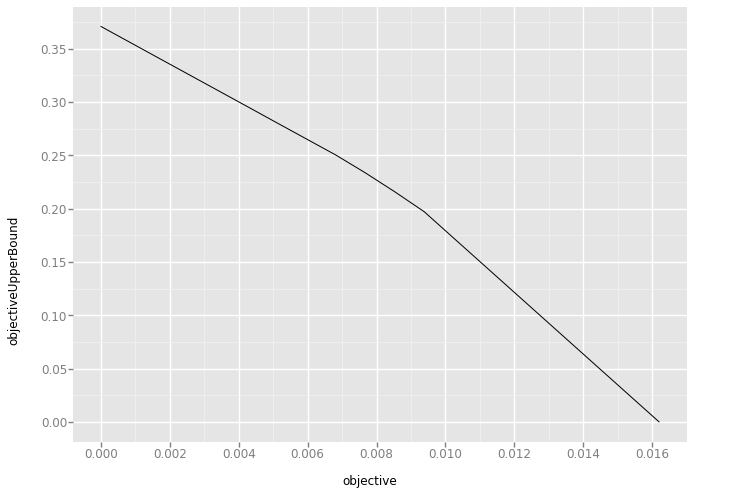

<ggplot: (-9223372036512220412)>

In [502]:
ggplot(aes('objective', 'objectiveUpperBound'), df) + geom_line()

In [546]:
from cameo import phenotypic_phase_plane

In [547]:
m.reactions.r_1714_REV.bounds

(1.0, 1.0)

In [548]:
from cobra.util import assert_optimal
def n_carbon(reaction):
    return sum(metabolite.elements.get('C', 0) for metabolite in reaction.metabolites)

m.solver.optimize()
assert_optimal(m)
m.reactions.get_by_any(list(m.medium))
f = [(reaction, reaction.flux * n_carbon(reaction) * -reaction.metabolites[list(reaction.metabolites)[0]]) 
 for reaction in model_reactions]
[(k, v) for k, v in f if v < 0]


[(<Reaction r_1714_REV at 0x11c772d30>, -0.8920476610767872)]

In [549]:
list(m.reactions.r_1714_REV.metabolites)[0]

<Metabolite s_0565_e at 0x1445055c0>

In [560]:
with m:
    m.reactions.DM_MNXM614_e.bounds =   0, 100
    m.reactions.r_1714_REV.bounds   = -10, 10
    df = phenotypic_phase_plane(m, m.reactions.r_2111, objective=m.reactions.DM_MNXM614_e,
                                source=m.reactions.r_1714_REV).data_frame
df

,r_2111,objective_lower_bound,objective_upper_bound,c_yield_lower_bound,c_yield_upper_bound,mass_yield_lower_bound,mass_yield_upper_bound
0,0.000000,0.0,1.620091e-02,0,0,-0.0,-8.529752e-02
1,0.019502,0.0,1.552603e-02,0,0,-0.0,-3.103672e-02
2,0.039004,0.0,1.485116e-02,0,0,-0.0,-1.832209e-02
3,0.058507,0.0,1.417628e-02,0,0,-0.0,-1.264753e-02
4,0.078009,0.0,1.350141e-02,0,0,-0.0,-9.433716e-03
5,0.097511,0.0,1.282653e-02,0,0,-0.0,-7.365223e-03
6,0.117013,0.0,1.215166e-02,0,0,-0.0,-5.922402e-03
7,0.136515,0.0,1.147679e-02,0,0,-0.0,-4.858668e-03
8,0.156017,0.0,1.080191e-02,0,0,-0.0,-4.041967e-03
9,0.175520,0.0,1.012704e-02,0,0,-0.0,-3.395199e-03


In [559]:
df.to_dict()['objective_upper_bound']

{0: 0.016200905259018815,
 1: 0.015526031108871156,
 2: 0.014851156958723372,
 3: 0.014176282808575863,
 4: 0.013501408658428218,
 5: 0.012826534466100669,
 6: 0.012151660307516994,
 7: 0.011476786148933415,
 8: 0.010801911990349512,
 9: 0.010127037831765934,
 10: 0.0094521636731826446,
 11: 0.0085861653434142794,
 12: 0.0076479850055165954,
 13: 0.0066277493453075868,
 14: 0.005523131630346261,
 15: 0.0044185139153851,
 16: 0.0033138962004239402,
 17: 0.0022092784854628607,
 18: 0.0011046607705011229,
 19: -3.9707012837453259e-08}

## Gecko

In [112]:
from cobra.io import read_sbml_model

from cobra import Gene, Reaction, Metabolite

In [333]:
def add_beta_carotene_pathway_yeast(model):
    model = model.copy()
    for m in model.metabolites:
        m.charge = 0
    crte = Gene(id="crte")
    crti = Gene(id="crti")
    crtyb = Gene(id="crtyb")
    model.genes.extend([crte, crti, crtyb])

    phytoene_c = Metabolite(id='phytoene_c', formula='C40H64', compartment='c')
    neurosporene_c = Metabolite(id='neurosporene_c', formula='C40H58',
                              compartment='c')
    lycopene_c = Metabolite(id='lycopene_c', formula='C40H56', compartment='c')
    beta_carotene_c = Metabolite(id='beta_carotene_c', formula='C40H56',
                               compartment='c')
    dihydro_beta_carotene_c = Metabolite(id='dihydro_beta_carotene_c',
                                       formula='C40H58',
                                       compartment='c')

    # 2 ggpp -> phytoene (c40h64) + 2pi? (crtYB) 2.5.1.32 max kcat: NA
    ggpp_phytoene = Reaction(id='ggpp_phytoene')
    ggpp_phytoene.add_metabolites(
        {model.metabolites.s_0189_c: -2, phytoene_c: 1,
         model.metabolites.s_0633_c: 2})

    # phytoene -> neurosporene (c40h58) (crtI) 1.3.5.6 max kcat: NA
    phytoene_neurosporene = Reaction(id='phytoene_neurosporene')
    phytoene_neurosporene.add_metabolites(
        {phytoene_c: -1, neurosporene_c: 1, model.metabolites.s_0794_c: 6})

    # neurosporene -> lycopene (c40h56) (crtI) 1.3.99.28 max kcat: NA
    neurosporene_lycopene = Reaction(id="neurosporene_lycopene")
    neurosporene_lycopene.add_metabolites(
        {neurosporene_c: -1, lycopene_c: 1, model.metabolites.s_0794_c: 2})

    # lycopene -> beta-carotene (crtYB) (c40h56) 5.5.1.19 max kcat: NA
    lycopene_betacarotene = Reaction(id='lycopene_betacarotene')
    lycopene_betacarotene.add_metabolites(
        {lycopene_c: -1, beta_carotene_c: 1})

    # lycopene -> beta-carotene (crtYB) (c40h56) 5.5.1.19 max kcat: NA
    EX_betacarotene = Reaction(id='EX_betacarotene')
    EX_betacarotene.add_metabolites(
        {beta_carotene_c: -1})
    EX_betacarotene.bounds = (0, 1000)

    # neurosporene -> 7,8-dihydro-beta-carotene (crtYB) (c40h58) max kcat: NA
    neurosporene_dihydrobetacarotene = Reaction(
        id='neurosporene_dihydrobetacarotene')
    neurosporene_dihydrobetacarotene.add_metabolites(
        {neurosporene_c: -1, dihydro_beta_carotene_c: 1})

    betacarotene_synthesis = [ggpp_phytoene, phytoene_neurosporene,
                              neurosporene_lycopene,
                              lycopene_betacarotene,
                              neurosporene_dihydrobetacarotene]

    assert all(
        len(r.check_mass_balance()) == 0 for r in betacarotene_synthesis)
    betacarotene_synthesis.append(EX_betacarotene)
    model.add_reactions(betacarotene_synthesis)

    model.reactions.ggpp_phytoene.gene_reaction_rule = 'crtyb'
    model.reactions.phytoene_neurosporene.gene_reaction_rule = 'crti'
    model.reactions.neurosporene_lycopene.gene_reaction_rule = 'crti'
    model.reactions.lycopene_betacarotene.gene_reaction_rule = 'crtyb'
    model.reactions.neurosporene_dihydrobetacarotene.gene_reaction_rule = 'crtyb'

    return model

In [334]:
gecko = read_sbml_model('/Users/henred/proj/model/model/data/ecYeast7.sbml.gz')

In [335]:
bc_gecko = add_beta_carotene_pathway_yeast(gecko)

In [349]:
[(n['id'], n['name']) for n in m.notes['changes']['added']['metabolites']]

[('MNXM1480_e', 'indan-1-one'),
 ('MNXM1039_e', 'all-trans-zeta-carotene'),
 ('MNXM1480_c', 'indan-1-one'),
 ('MNXM24_e', 'AH2'),
 ('MNXM614_e', 'all-trans-beta-carotene'),
 ('MNXM6800_c', ''),
 ('MNXM557_e', '15-cis-phytoene'),
 ('MNXM2099_c', 'all-trans-phytofluene'),
 ('MNXM949_e', 'neurosporene'),
 ('MNXM949_c', 'neurosporene'),
 ('MNXM557_c', '15-cis-phytoene'),
 ('MNXM445_c', 'lycopene'),
 ('MNXM614_c', 'all-trans-beta-carotene'),
 ('MNXM445_e', 'lycopene'),
 ('MNXM10398_c', '7,8-Dihydro-beta-carotene'),
 ('MNXM1788_e', '(1R,2R,3R)-prephytoene diphosphate'),
 ('MNXM1910_e', 'all-trans-phytoene'),
 ('MNXM2099_e', 'all-trans-phytofluene'),
 ('MNXM35_e', 'A'),
 ('MNXM1048_e', 'gamma-carotene'),
 ('MNXM1048_c', 'gamma-carotene'),
 ('MNXM1910_c', 'all-trans-phytoene'),
 ('MNXM6800_e', ''),
 ('MNXM3549_e', 'beta-zeacarotene'),
 ('MNXM1039_c', 'all-trans-zeta-carotene'),
 ('MNXM1788_c', '(1R,2R,3R)-prephytoene diphosphate'),
 ('MNXM24_c', 'AH2'),
 ('MNXM35_c', 'A'),
 ('MNXM10398_e', '7,

In [350]:
m.metabolites.MNXM35_c.reactions

frozenset({<Reaction R04798 at 0x137e7e048>,
           <Reaction R09692 at 0x137e7e278>,
           <Reaction R04787 at 0x137e7e358>,
           <Reaction adapter_MNXM35_c_MNXM35_e at 0x137e7e198>,
           <Reaction R04800 at 0x137e7e3c8>})

In [353]:
m.reactions.R04800.build_reaction_string(use_metabolite_names=False)

'MNXM24_c + MNXM949_c + s_1275_c <=> MNXM35_c + MNXM445_c + 2.0 s_0803_c'

In [354]:
m.reactions.R04800.build_reaction_string(use_metabolite_names=True)

'AH2 + neurosporene + oxygen <=> A + lycopene + 2.0 H2O'

In [445]:
with m:
    m.optimize()
    m.summary()

with bc_gecko:
    bc_gecko.optimize()
    bc_gecko.summary()

with gecko:
    gecko.optimize()
    gecko.summary()


IN FLUXES              OUT FLUXES         OBJECTIVES
---------------------  -----------------  --------------
s_1277_e     2.51      s_0450_c   0.0967  r_2111  0.0967
s_0565_e     1         MNXM614_e  0.0007
s_0420_e     0.464
prot_pool_c  0.0854
s_1324_e     0.0767
s_1468_e     0.00656
s_0925_e     9.67e-08
IN FLUXES             OUT FLUXES        OBJECTIVES
--------------------  ----------------  --------------
s_1277_e     2.52     s_0450_c  0.0974  r_2111  0.0974
s_0565_e     1
s_0420_e     0.467
s_1324_e     0.0773
prot_pool_c  0.0286
s_1468_e     0.00661
IN FLUXES              OUT FLUXES        OBJECTIVES
---------------------  ----------------  --------------
s_1277_e     2.52      s_0450_c  0.0974  r_2111  0.0974
s_0565_e     1
s_0420_e     0.467
prot_pool_c  0.0854
s_1324_e     0.0773
s_1468_e     0.00661
s_0925_e     9.74e-08


In [601]:
r = requests.post(m_url + '/models/iJO1366', 
                  json={'message':{'to-return': ['model', 'fluxes'], 'simulation-method':'pfba-fva', 
                                   'map': 'Central metabolism'}})

In [602]:
for i in range(5):
    r = requests.post(m_url + '/models/iJO1366', 
                      json={'message':{'to-return': ['model', 'fluxes'], 'simulation-method':'pfba', 
                                       'map': 'Central metabolism'}})

In [585]:
for i in range(20):
    sleep(1)
    r = requests.post('http://web-1.model-test.61cedb8c.cont.dockerapp.io:32788' + '/models/iJO1366', 
                      json={'message':{'to-return': ['model', 'fluxes'], 'simulation-method':'pfba', 
                                       'map': 'Central metabolism'}})
    print(r.ok)

False
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
False
True
True
